# LEAD SCORING CASE STUDY

In [32]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [33]:
# Importing the Libraries and packages

#import Numpy and Pandas
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import other libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

In [34]:
# Reading the dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [35]:
# Checking the shape
lead_data.shape

(9240, 37)

In [36]:
# Understanding the columns
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [37]:
# Summary of dataset
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [38]:
# Checking info to know more about data
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

According to this info it is seen that there are more categorical variables in the dataset. We can use this categorical variables to create dummy vairables. Also, there are null values present in the dataset so we need to treat them accordingly.

### Exploratory Data Analysis

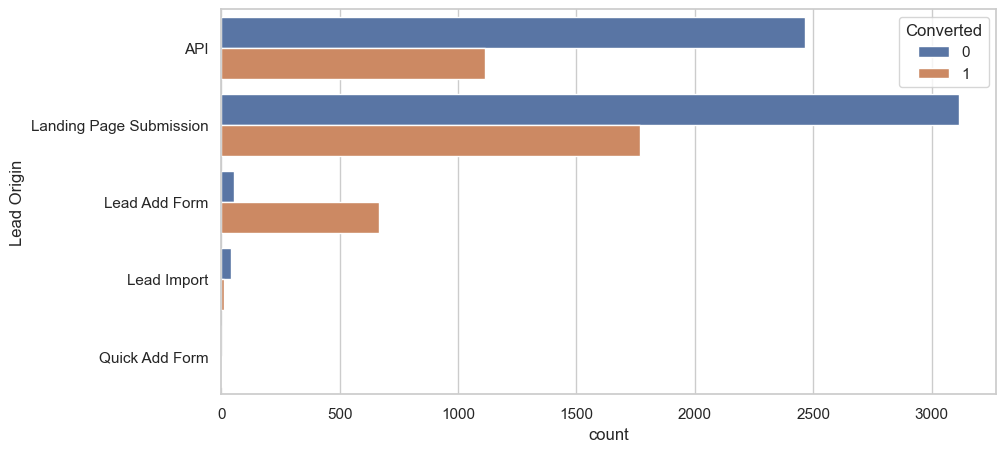

In [39]:
#Understanding Lead Conversion and Lead Origin
plt.figure(figsize=(10, 5))
sns.countplot(y="Lead Origin", hue="Converted", data=lead_data)
plt.show()

As seen from Lead Origin finding, maximum lead conversion happened from Landing Page Submission.

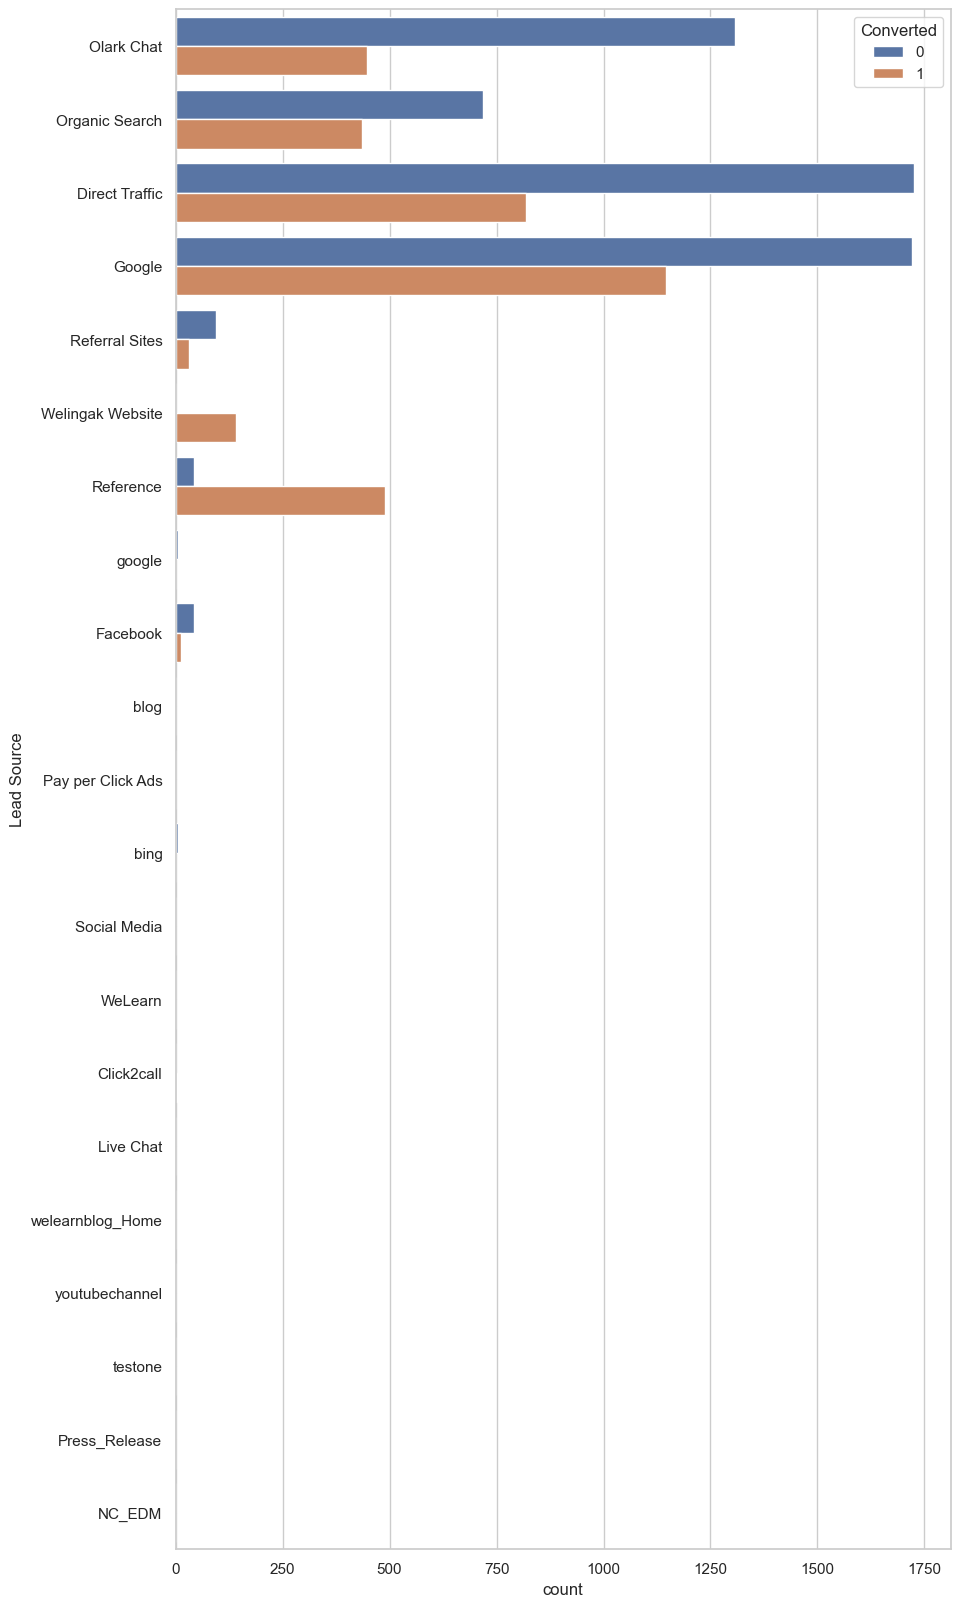

In [40]:
#Understanding Lead Conversion and Lead Source
plt.figure(figsize=(10, 20))
sns.countplot(y="Lead Source", hue="Converted", data=lead_data)
plt.show()

From the above graph, major lead conversion in the lead source is from 'Google'.

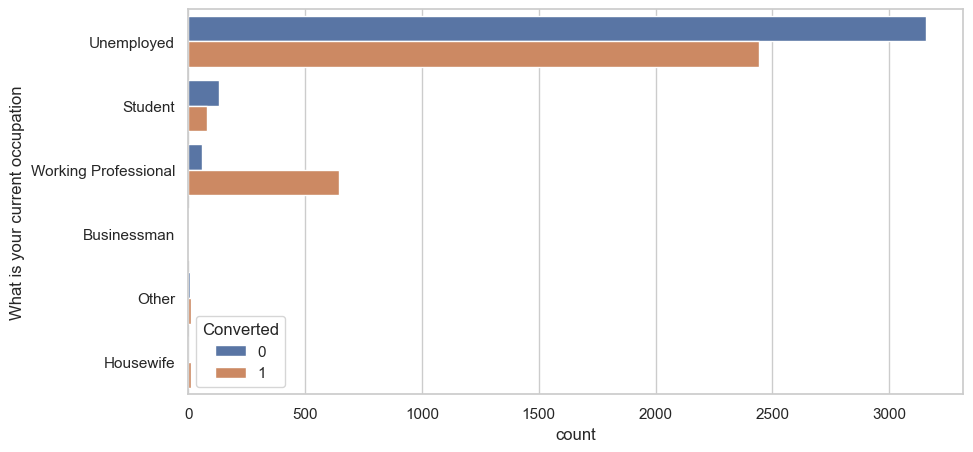

In [41]:
#Understanding Lead Conversion and Current Occupation 
plt.figure(figsize=(10, 5))
sns.countplot(y="What is your current occupation", hue="Converted", data=lead_data)
plt.show()

From the above graph it is seen that, major lead conversion is from the Unemployed Group.

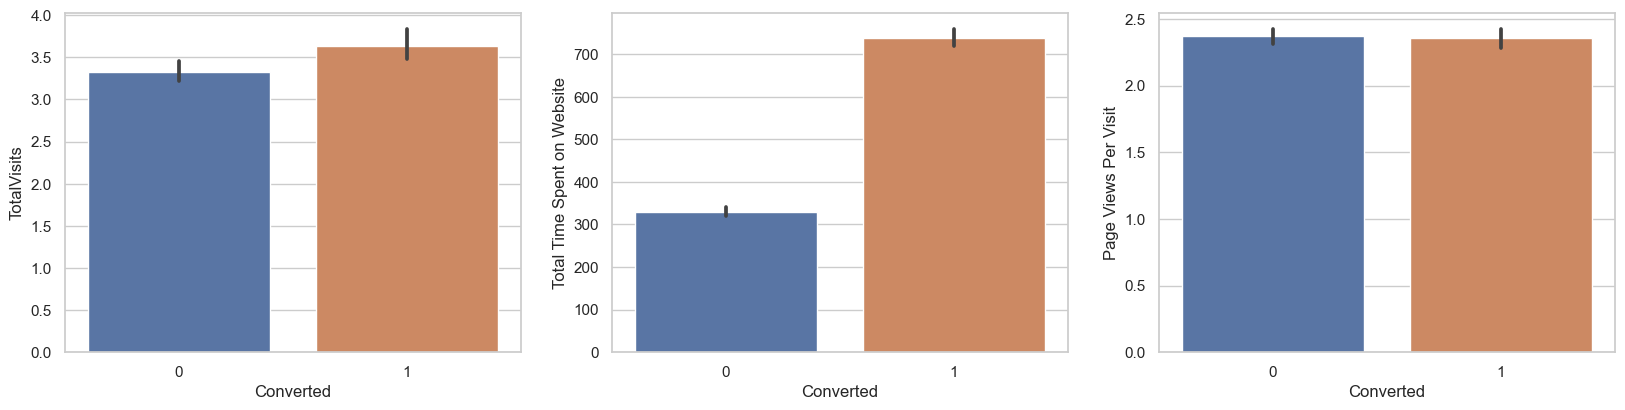

In [42]:
#Understanding the Lead Conversion on TotalVisits, Total Time Spent on Website, Page Views Per Visit
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.barplot(x = 'Converted', y = 'TotalVisits', data = lead_data)

plt.subplot(3,3,2)
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = lead_data)

plt.subplot(3,3,3)
sns.barplot(x = 'Converted', y = 'Page Views Per Visit',data = lead_data)

plt.show()

From the above graph, we have mojor lead conversion from TotalVisits, Total Time Spent on Website, Page Views Per Visit.

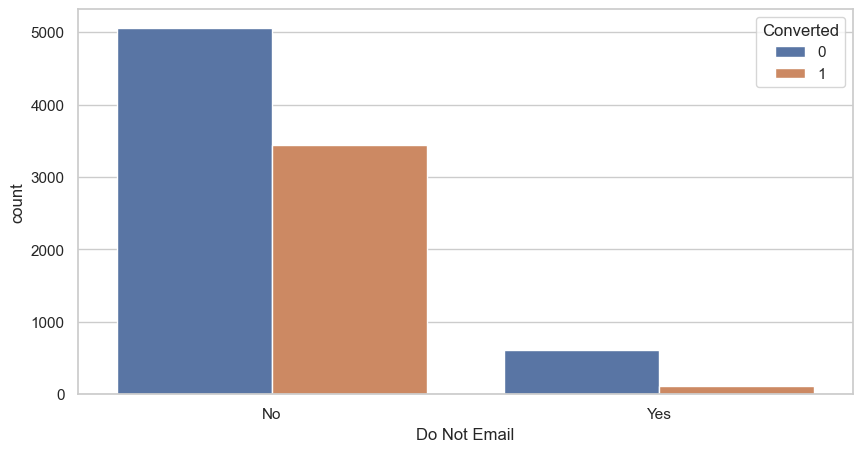

In [43]:
#Understanding Lead Conversion and Do Not Email 
plt.figure(figsize=(10, 5))
sns.countplot(x="Do Not Email", hue="Converted", data=lead_data)
plt.show()

Based on the above graph, major lead conversion has happend from the emails that have been sent.

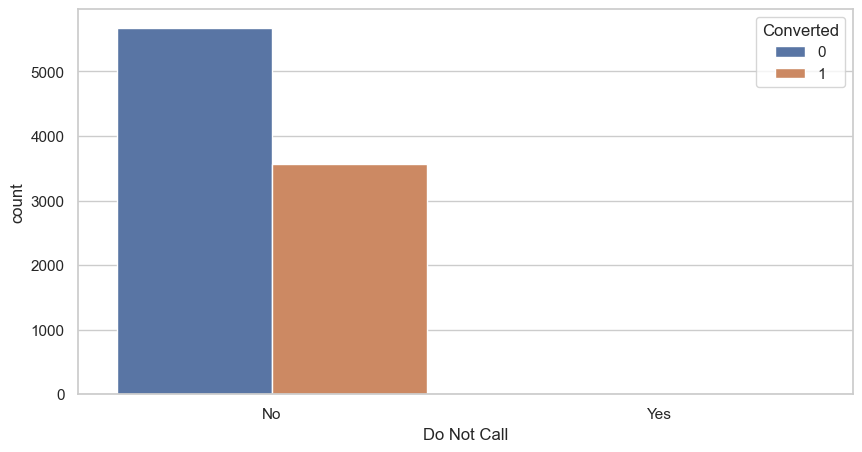

In [44]:
#Understanding Lead Conversion and Do Not Call
plt.figure(figsize=(10, 5))
sns.countplot(x="Do Not Call", hue="Converted", data=lead_data)
plt.show()

#### Observations from EDA Process  
- The highest lead conversion rate was observed for leads generated through Landing Page Submissions.
- The lead source 'Google' contributed significantly to lead conversions.
- The Unemployed group showed a notable conversion rate among leads.
- Lead conversions were positively correlated with metrics like TotalVisits, Total Time Spent on Website, and Page Views Per Visit.
- Email campaigns resulted in a significant number of lead conversions.

In [45]:
# checking the value counts of each variables to find insights

for i in lead_data.columns:
    print(lead_data[i].value_counts())
    print('---------------------------------------')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
---------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
---------------------------------------
Go

After analyzing the data, we have identified several variables that can be removed from the dataset as they are not required for our analysis:

- Prospect ID: This identifier is not necessary for our analysis.
- Lead Number: This variable is not needed for our analysis.
- Country: Since our focus is on other aspects of the data, we can remove this variable.
- Receive More Updates About Our Courses: This column only contains 'No' responses, making it redundant for our analysis.
- Update me on Supply Chain Content: Similar to the previous variable, this column only contains 'No' responses.
- Get updates on DM Content: This column only contains 'No' responses.
- I agree to pay the amount through cheque: This column only contains 'No' responses.
- Magazine: This column only contains 'No' responses.

Additionally, we will transform the following columns from yes/no categories to 1/0 binary variables:

- Do Not Email
- Do Not Call
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
-  Recommendations
-  free copy of Mastering The Interview

## Data Cleaning

In [46]:
#dropping redundant columns from above insights

lead_data = lead_data.drop(['Prospect ID', 'Lead Number', 'Country', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque','Magazine'], axis = 1 )

In [47]:
lead_data.shape

(9240, 28)

Now we have noticed that there are columns which have 'select' category which means customer did not select any of the options.
That values eventually act as null values, thus we will make them null.

**Dealing with Select labels**

In [48]:
# Creating a for loop and listing the columns having 'Select'
have_select = []
for i in lead_data.columns:
    if len(lead_data[i].isin(['Select']).unique())>1:
        have_select.append(i)
        
have_select # Columns having Select option

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [49]:
# now replacing 'Select' category with null values

for i in have_select:
    lead_data[i] = lead_data[i].replace('Select',np.NaN)

lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,02.Medium,01.High,15.0,18.0,No,Modified


In [50]:
# Checking percentage of missing values after removing the imputing 'Select' with Null values

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

From the above it is observed that there are columns having more than 40% missing values, so it is better to remove these columns as it imputing them could lead to bias predictions.

**Dropping columns having missing values above 40%**

In [52]:
#dropping columns having missing values more than 40%
above_40 = list(round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)[round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2) > 40].index)
lead_data = lead_data.drop(above_40, axis =1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [53]:
#checking shape of data set after removing columns
lead_data.shape

(9240, 21)

### Missing Values Imputation

Now we will impute values for columns having missing values less than 40%

In [54]:
# finding columns having missing values above 0 and below 40 %

below_40 = list(round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)[round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2) > 0].index)

below_40

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags']

Based on the problem statement, we have determined that the columns 'Last Activity' and 'Tags' are provided by the sales team and are not required for model building. Therefore, we will remove these columns from the dataset before proceeding with the model building process. This will ensure that our model focuses on the relevant features for prediction.

In [55]:
# 1. Dealing Lead Source

print(lead_data['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', lead_data['Lead Source'].isna().sum())
print('=================================================================')

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 36


To address the skewness in the data and handle missing values, the following steps will be implemented:

- Several labels in the dataset, including Facebook, Bing, Click2call, Live Chat, Press_Release, Social Media, testone, WeLearn, blog, Pay per Click Ads, welearnblog_Home, youtubechannel, and NC_EDM, will be consolidated into a single label 'Others' to reduce skewness and simplify the dataset.
- Missing values in the dataset will be filled using the most frequently occurring label in each respective column.

These adjustments will help improve the quality of the dataset for analysis and modeling purposes.

In [56]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')

print(lead_data['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', lead_data['Lead Source'].isna().sum())
print('=================================================================')

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 36


In [57]:
# imputing missing values to max occuring label i.e. Google

lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.NaN,'Google')

print(lead_data['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', lead_data['Lead Source'].isna().sum())
print('=================================================================')

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 0


In [58]:
# 2. Dealing with Specialization

print(lead_data['Specialization'].value_counts())
print('-----------')
print('Missing values count --->', lead_data['Specialization'].isna().sum())
print('=================================================================')

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
-----------
Missing values count ---> 3380


Here we will create another category for missing values as the count is very high and imputing missing values with median can lead to misleading results.

In [59]:
# replacing missing values with label 'Missing'

lead_data['Specialization'] = lead_data['Specialization'].replace(np.NaN,'Missing')
lead_data['Specialization'].value_counts()

Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [60]:
# 3. 'What is your current occupation'

print(lead_data['What is your current occupation'].value_counts())
print('-----------')
print('Missing values count --->', lead_data['What is your current occupation'].isna().sum())
print('=================================================================')

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
-----------
Missing values count ---> 2690


Here also we will create another category for missing values as the count is very high and imputing missing values with median can lead to misleading results.

In [61]:
# replacing missing values with label 'Missing'

lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.NaN,'Missing')
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [62]:
# 4. 'What matters most to you in choosing a course'

print(lead_data['What matters most to you in choosing a course'].value_counts())
print('-----------')
print('Missing values count --->', lead_data['What matters most to you in choosing a course'].isna().sum())
print('=================================================================')

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
-----------
Missing values count ---> 2709


The data is higly skewed for this column and the missing values are also high, it's better we drop the column.

In [63]:
lead_data = lead_data.drop('What matters most to you in choosing a course', axis=1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Missing,Unemployed,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [64]:
# Dealing with  5. 'TotalVisits', 6. 'Page Views Per Visit', 7. 'Last Activity', 8. 'Tags'

# checking value counts and missing values count for all the columns

miss_max = ['TotalVisits','Page Views Per Visit','Last Activity','Tags'] # assigning them in a list

for i in lead_data[miss_max].columns:
    print(lead_data[i].value_counts())
    print('-----------')
    print('Missing values count --->', lead_data[i].isna().sum())
    print('=================================================================')

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64
-----------
Missing values count ---> 137
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64
-----------
Missing values count ---> 137
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Pa

We will impute all the missing values with label having max occurences.

In [65]:
# imputing all the missing values with label having max occurences

for i in lead_data[miss_max].columns:
    max_str = lead_data[i].value_counts()[lead_data[i].value_counts() == lead_data[i].value_counts().max()].index[0]
    lead_data[i] = lead_data[i].fillna(value=max_str)
    print(lead_data[i].value_counts())
    print('-----------')
    print('Missing values count --->', lead_data[i].isna().sum())
    print('=================================================================')

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64
-----------
Missing values count ---> 0
0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64
-----------
Missing values count ---> 0
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page V

### Checking Missing Values

In [66]:
# checking rows having missing values more than 40%

missing_row_count = lead_data.apply(lambda x: round(100*(sum(x.isnull().values)/len(lead_data.index)),2), axis = 1)
missing_row_count[missing_row_count > 40]

Series([], dtype: float64)

This shows that there are no row with missing values more than 40%.

In [67]:
# checking if any more null values in any columns
lead_data.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now all the data we have does not contain any missing values and is cleaned up. Now we will proceed with data transformation for some columns having yes/no labels and will convert columns with numerical data to categorical data.

## Data Transformation

In [68]:
#checking data set information to check the columns yes/no labels
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [69]:
# creating a variable and storing the columns names for run in a loop

yes_no = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']


# creating dictionary for two categories where; Yes : 1 , No : 0

category={"No":0,"Yes":1}    

for i in yes_no:
    lead_data[i]=lead_data[i].map(category)


lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


**Checking for outliers**

In [70]:
# checking the statistical data
lead_data.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554
std,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
97%,1.000000,0.000000,1.000000,11.000000,1660.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


As it is observed there are outliers in 2 variables 'TotalVisits' and 'Page Views Per Visit'.

Let's visualize the outliers using boxplot to understand the outliers.

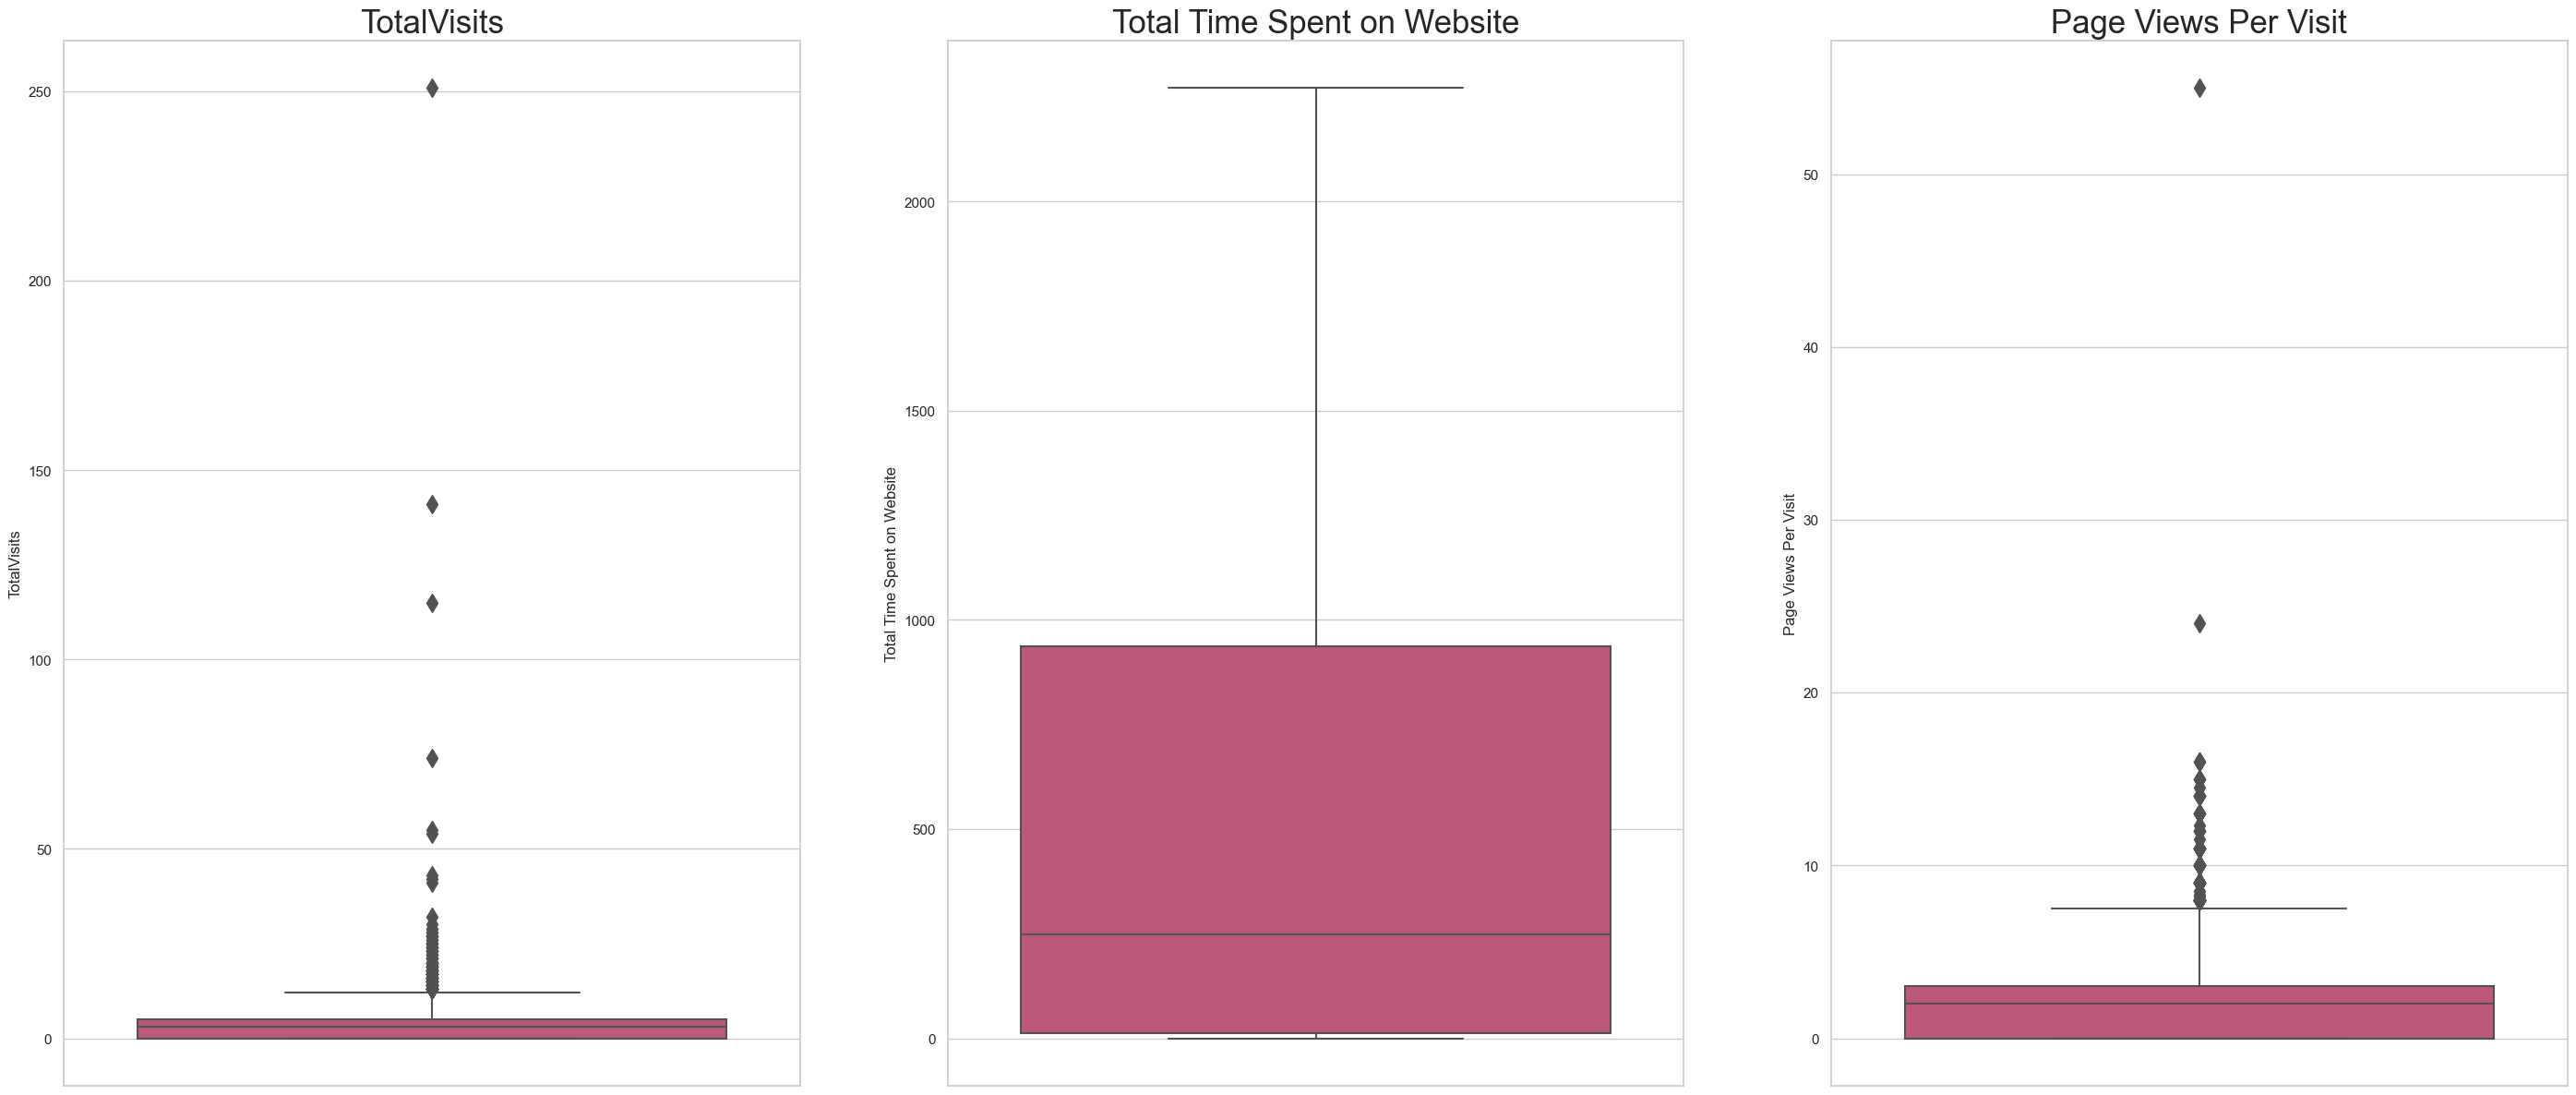

In [71]:
# setting figure size
plt.figure(figsize=(35,50))

# Title names for the columns in the dataset

col_title={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col_title[i],fontsize=25)
    sns.boxplot(y=lead_data[col_title[i]],data=lead_data,palette='plasma',fliersize=10)

From the above boxplots we can now confirm that we have two outlier variables in our dataset ('TotalVisits' and 'Page Views Per Visit'). Now as per business requirement we cannot drop these outliers because it may impact our analysis/model so we will create bins for these two outliers.

#### Creating Bins

In [73]:
# 1. dealing with 'TotalVisits' variable
# As we have range from 0 to 251 we will create buckets as per need

# creating labels
TotalVisits_labels = ['TotalVisits_0', 'TotalVisits_1_2','TotalVisits_3_4','TotalVisits_5_6','TotalVisits_7_8','TotalVisits_9_10',
       'TotalVisits_11_12','TotalVisits_12_15','TotalVisits_above_15']

# creating bins for TotalVisits__labels
lead_data['TotalVisits'] = pd.cut(lead_data['TotalVisits'], bins=[-1,0.0,2,4,6,8,10,12,15,251], labels = TotalVisits_labels)

In [74]:
lead_data['TotalVisits'].value_counts()

TotalVisits_3_4         2426
TotalVisits_0           2326
TotalVisits_1_2         2075
TotalVisits_5_6         1249
TotalVisits_7_8          533
TotalVisits_9_10         278
TotalVisits_11_12        131
TotalVisits_above_15     120
TotalVisits_12_15        102
Name: TotalVisits, dtype: int64

In [75]:
# 2. dealing with 'Page Views Per Visit' variable
# As we have range from 0 to 55 we will create buckets as per need

# creating labels
pvpv_labels=['Page_Views_Per_Visit_0','Page_Views_Per_Visit_1_2','Page_Views_Per_Visit_3_4',
            'Page_Views_Per_Visit_5_6','Page_Views_Per_Visit_7_8','Page_Views_Per_Visit_9_10','Page_Views_Per_Visit_above_10']

# creating bins for 'Page Views Per Visit'
lead_data['Page Views Per Visit'] = pd.cut(lead_data['Page Views Per Visit'], bins=[-1,0,2,4,6,8,10,60], labels = pvpv_labels)

In [76]:
lead_data['Page Views Per Visit'].value_counts()

Page_Views_Per_Visit_1_2         3007
Page_Views_Per_Visit_3_4         2696
Page_Views_Per_Visit_0           2326
Page_Views_Per_Visit_5_6          851
Page_Views_Per_Visit_7_8          237
Page_Views_Per_Visit_9_10          73
Page_Views_Per_Visit_above_10      50
Name: Page Views Per Visit, dtype: int64

In [77]:
# checking data set after creating bins
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,TotalVisits_0,0,Page_Views_Per_Visit_0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,TotalVisits_5_6,674,Page_Views_Per_Visit_3_4,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_1_2,1532,Page_Views_Per_Visit_1_2,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_1_2,305,Page_Views_Per_Visit_1_2,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,TotalVisits_1_2,1428,Page_Views_Per_Visit_1_2,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


After creating bins we removed the outliers and are now good to go. Before creating the dummy variables let's remove redundant columns/varaibles.

Also from above we know columns : 'Last Activity', 'Tags', 'Last Notable Activity' activity columns came from sales team, thus we will drop these redundant columns.

In [78]:
# dropping redundant column

redundant=['Last Activity', 'Tags', 'Last Notable Activity']

lead_data=lead_data.drop(redundant,axis=1)

lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,TotalVisits_0,0,Page_Views_Per_Visit_0,Missing,Unemployed,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,TotalVisits_5_6,674,Page_Views_Per_Visit_3_4,Missing,Unemployed,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_1_2,1532,Page_Views_Per_Visit_1_2,Business Administration,Student,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_1_2,305,Page_Views_Per_Visit_1_2,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,TotalVisits_1_2,1428,Page_Views_Per_Visit_1_2,Missing,Unemployed,0,0,0,0,0,0,0


In [79]:
lead_data.shape

(9240, 17)

Next, we will create dummy variables for mutiple levels of categories.

**Creating Dummy Variables**

In [80]:
#Creating a dummy variables for 4 categories and dropping the first level. 

cat = ['Lead Origin', 'Lead Source','Specialization','What is your current occupation','TotalVisits','Page Views Per Visit']

#creating dummy variables data set
dummy = pd.get_dummies(lead_data[cat], drop_first=True)

# Adding these dummies to our original dataset
lead_data = pd.concat([lead_data,dummy],axis=1)

#dropping the duplicate columns
lead_data = lead_data.drop(cat, axis=1)

#viewing the dataset
lead_data.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [81]:
#checking statistical data
lead_data.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,487.698268,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554,0.528788,0.077706,0.005952,0.000108,0.314827,0.189935,0.124892,0.037338,0.057792,0.043615,0.006169,0.012121,0.105628,0.017208,0.012338,0.091775,0.039610,0.019264,0.090693,0.021970,0.365801,0.054437,0.010823,0.007900,0.004329,0.037771,0.021970,0.001082,0.291126,0.001732,0.022727,0.606061,0.076407,0.224567,0.262554,0.135173,0.057684,0.030087,0.014177,0.011039,0.012987,0.325433,0.291775,0.092100,0.025649,0.007900,0.005411
std,0.270435,0.014711,0.486714,548.021466,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559,0.499198,0.267722,0.076926,0.010403,0.464472,0.392271,0.330614,0.189598,0.233363,0.204247,0.078304,0.109433,0.307377,0.130052,0.110394,0.288724,0.195053,0.137459,0.287187,0.146592,0.481680,0.226891,0.103472,0.088537,0.065656,0.190651,0.146592,0.032882,0.454306,0.041579,0.149041,0.488648,0.265662,0.417320,0.440046,0.341927,0.233158,0.170835,0.118229,0.104491,0.113224,0.468562,0.454604,0.289182,0.158095,0.088537,0.073366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [82]:
#checking shape of the data set
lead_data.shape

(9240, 58)

From above tables we now see that all columns are converted to numerical data.

## Data Preparation

### Test-Train Split

In [83]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [84]:
# putting feature varibales in "X" and target variable in "y" 

y=lead_data['Converted'] 
X=lead_data.drop('Converted',1)

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1428,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [86]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [87]:
#looking all the X, y train and test sets
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6468, 57)
X_test: (2772, 57)
y_train: (6468,)
y_test: (2772,)


### Feature Standardization

In [88]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  # Creating an object

In [89]:
# Now, Scaling  'Total Time Spent on Website' variables with standard scaler and fitting on X_train dataset

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.describe()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
count,6468.000000,6468.000000,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000309,-6.701161e-17,0.001701,0.000309,0.000155,0.000155,0.000464,0.001082,0.311843,0.528139,0.079468,0.005102,0.000155,0.320810,0.190167,0.121058,0.036178,0.060297,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.367502,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.292672,0.001237,0.021027,0.605133,0.077613,0.226809,0.263915,0.133581,0.054731,0.029994,0.013451,0.011905,0.014069,0.329777,0.290507,0.089827,0.024583,0.008658,0.005102
std,0.268799,0.017583,1.000077e+00,0.041207,0.017583,0.012434,0.012434,0.021533,0.032882,0.463282,0.499246,0.270489,0.071252,0.012434,0.466824,0.392463,0.326219,0.186748,0.238054,0.204218,0.075423,0.113227,0.307146,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.482162,0.232251,0.103475,0.084940,0.069069,0.190168,0.144512,0.037279,0.455024,0.035150,0.143484,0.488860,0.267582,0.418800,0.440788,0.340228,0.227472,0.170583,0.115204,0.108466,0.117786,0.470169,0.454031,0.285956,0.154861,0.092652,0.071252
min,0.000000,0.000000,-8.853708e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [90]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

print('Current Conversion Rate:',round((sum(y)/len(y.index))*100,2))

Current Conversion Rate: 38.54


### Correlation in Dataset

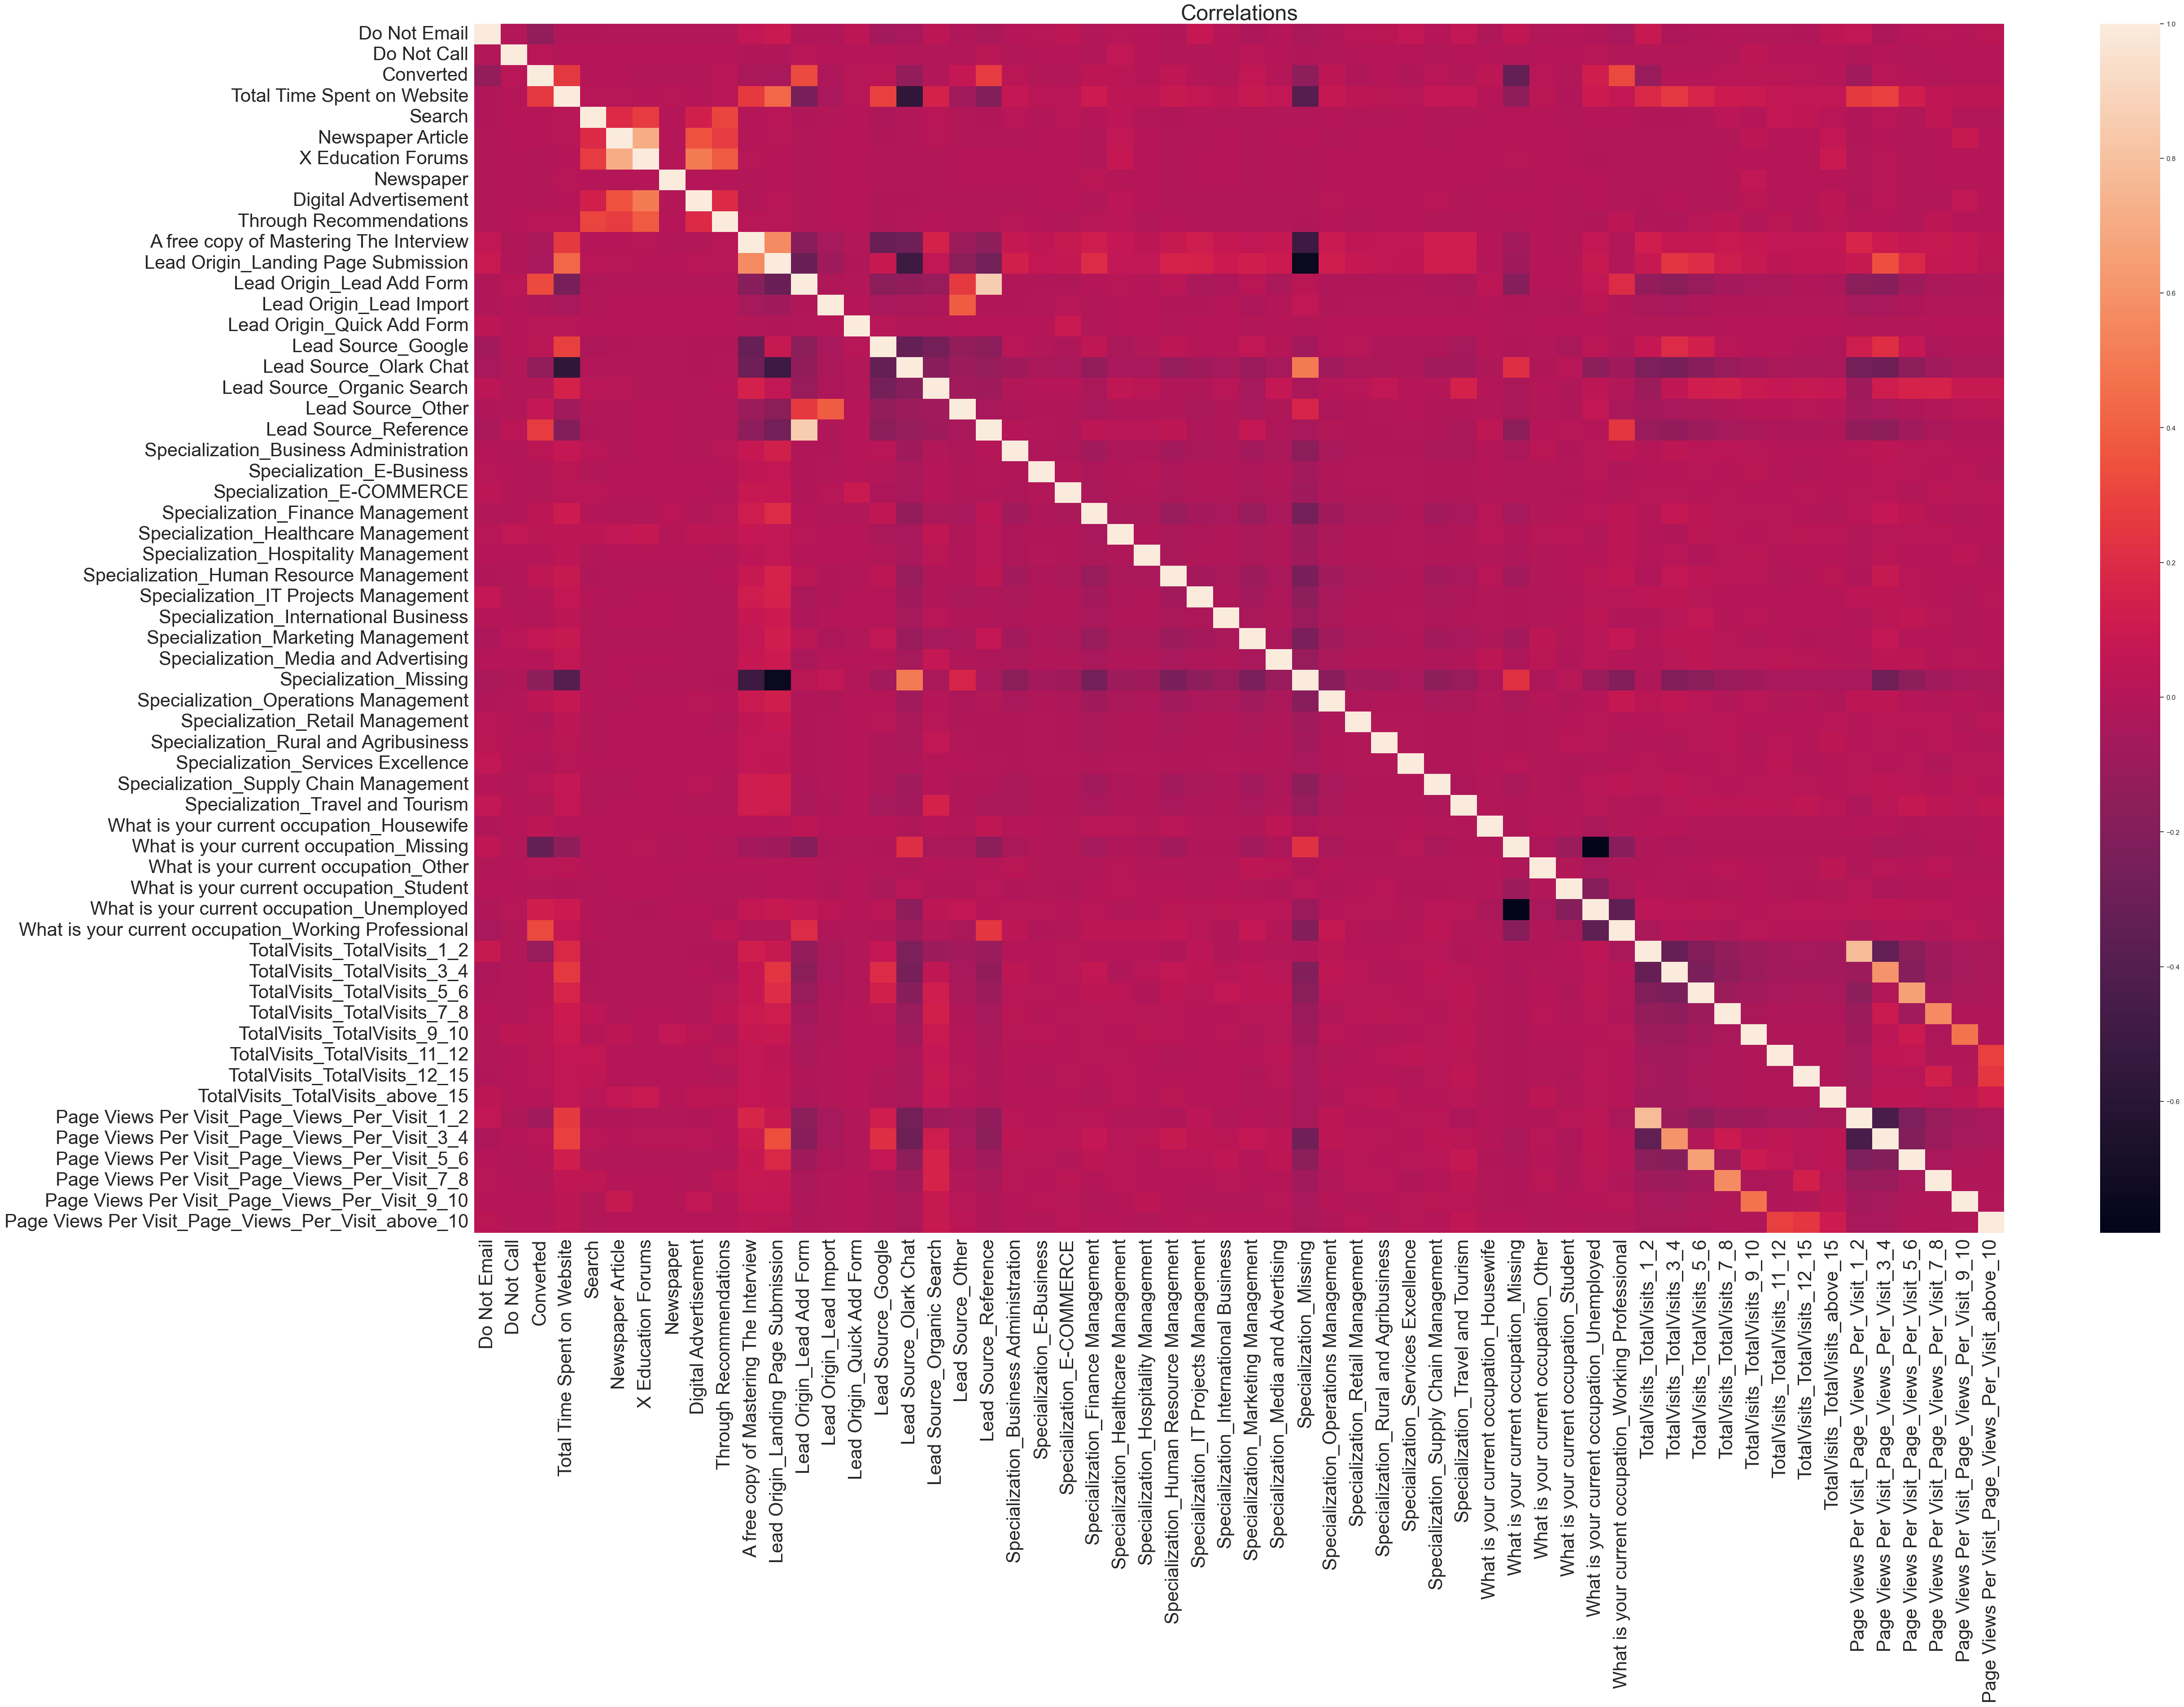

In [91]:
# setting the figure size
plt.figure(figsize=(55,35))

# Plotting a heatmap

sns.heatmap(lead_data.corr(method='spearman'))
plt.title('Correlations', fontsize =35)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.show()

Correlation is shown above by use of heatmap, from the above plot we couldn't find much which features are highly correlated and to drop thus we will now proceed with building our model and based on the p-values and VIFs, we will again check for correlation.

## Model Building

In [92]:
# importing statmodels library for statistical summary and model creation

import statsmodels.api as sm

We are going to use hybrid model creation using RFE and manual features selection.

### Feature selection using RFE 

In [102]:
# Importing RFE and logistic regression libraries from scikit learn

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# creating an object

logreg = LogisticRegression()                

In [107]:
# Assuming logreg is already defined as your logistic regression model
# Assuming X_train and y_train are your training features and target, respectively

# Initialize the RFE object with 15 features and the logistic regression model
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE model to the training data
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [108]:
#listing which all columns are selected(True) by RFE and which all are rejected(False)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 42),
 ('Newspaper Article', False, 11),
 ('X Education Forums', False, 20),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 8),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 43),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Other', False, 36),
 ('Lead Source_Reference', False, 3),
 ('Specialization_Business Administration', False, 21),
 ('Specialization_E-Business', False, 31),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_Finance Management', False, 40),
 ('Specialization_Healthcare Management', False, 37),
 ('Specialization_Hospitality

In [111]:
# storing selected(True) columns by RFE in a list
rfe_col = X_train.columns[rfe.support_]

# listing features removed by RFE feature selection
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Reference', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       '

In [112]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Hospitality Management,Specialization_Missing,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Working Professional,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10
1871,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.005716,1,0,0,0,1,0,0,0,1,0,0,0,0
3516,0,-0.691418,0,0,0,0,1,0,0,0,0,1,0,0,0
8105,0,1.365219,1,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,-0.885371,0,0,0,0,1,0,0,0,0,0,0,0,0


### Model 1

In [115]:
# creating 1st model

# Adding a constant
X_train_1=sm.add_constant(X_train_rfe)

# creating a model and fitting it.

logr1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial()).fit()   # Using GLM for creating model and fitting it
logr1.summary()                                                       #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.5
Date:                Sat, 20 Jan 2024   Deviance:                       5699.1
Time:                        21:22:22   Pearson chi2:                 9.01e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3612
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1330      0.136      8.345      0.000       0.867       1.399
Do Not Email                                            -1.2865      0.160     -8.055      0.000      -1.600      -0.973
Total Time Spent on Website                              1.1141      0.039     28.510      0.000       1.037       1.191
Lead Origin_Landing Page Submission                     -0.9087      0.119     -7.607      0.000      -1.143      -0.675
Lead Origin_Lead Add Form                                2.5615      0.188     13.607      0.000       2.193       2.930
Lead Origin_Lead Import                                 -1.5579      0.538     -2.897      0.004      -2.612      -0.504
Specialization_Hospitality Management                   -1.0284      0.327     -3.141      0.002      -1.670      -0.387
Specialization_Missing                                  -0.9752      0.119     -8.164      0.000      -1.209      -0.741
What is your current occupation_Housewife               22.3639   1.32e+04      0.002      0.999   -2.58e+04    2.58e+04
What is your current occupation_Missing                 -1.1869      0.083    -14.245      0.000      -1.350      -1.024
What is your current occupation_Working Professional     2.4044      0.185     12.982      0.000       2.041       2.767
Page Views Per Visit_Page_Views_Per_Visit_1_2           -1.1833      0.118    -10.005      0.000      -1.415      -0.952
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.9541      0.127     -7.531      0.000      -1.202      -0.706
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.8874      0.154     -5.766      0.000      -1.189      -0.586
Page Views Per Visit_Page_Views_Per_Visit_7_8           -0.8564      0.234     -3.655      0.000      -1.316      -0.397
Page Views Per Visit_Page_Views_Per_Visit_9_10          -1.0598      0.373     -2.842      0.004      -1.791      -0.329
========================================================================================================================
"""

Now, From the above summary it is seen that there are some features having high p -values, we will drop features having insignificant values one by one and create new models until all the features attain significant p-value<0.05 and vif-values < 4.

### Calculating VIF

In [116]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X_train_rfe[rfe_col].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_rfe[rfe_col].values,i) for i in range(X_train_rfe[rfe_col].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)
vif   # Viewing the dataset

,Features,VIF
2,Lead Origin_Landing Page Submission,4.87
11,Page Views Per Visit_Page_Views_Per_Visit_3_4,3.06
10,Page Views Per Visit_Page_Views_Per_Visit_1_2,2.77
6,Specialization_Missing,2.07
12,Page Views Per Visit_Page_Views_Per_Visit_5_6,1.65
8,What is your current occupation_Missing,1.56
1,Total Time Spent on Website,1.26
13,Page Views Per Visit_Page_Views_Per_Visit_7_8,1.17
3,Lead Origin_Lead Add Form,1.16
9,What is your current occupation_Working Professional,1.15


### Model 2

For this we are dropping 'const','What is your current occupation_Housewife' due to high p-value

In [117]:
# Dropping the most insignificant values 'What is your current occupation_Housewife' and constant

X_train_rfe2 = X_train_1.drop(['const','What is your current occupation_Housewife'],1)

# Creating a new model 2

X_train_2=sm.add_constant(X_train_rfe2)                                 # Adding constant
logr2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr2.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.5
Date:                Sat, 20 Jan 2024   Deviance:                       5709.0
Time:                        21:24:10   Pearson chi2:                 9.03e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3603
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1352      0.136      8.362      0.000       0.869       1.401
Do Not Email                                            -1.2910      0.160     -8.083      0.000      -1.604      -0.978
Total Time Spent on Website                              1.1129      0.039     28.509      0.000       1.036       1.189
Lead Origin_Landing Page Submission                     -0.9055      0.119     -7.585      0.000      -1.139      -0.672
Lead Origin_Lead Add Form                                2.5701      0.188     13.665      0.000       2.201       2.939
Lead Origin_Lead Import                                 -1.5575      0.538     -2.897      0.004      -2.611      -0.504
Specialization_Hospitality Management                   -1.0328      0.327     -3.155      0.002      -1.674      -0.391
Specialization_Missing                                  -0.9786      0.119     -8.196      0.000      -1.213      -0.745
What is your current occupation_Missing                 -1.1897      0.083    -14.283      0.000      -1.353      -1.026
What is your current occupation_Working Professional     2.3987      0.185     12.953      0.000       2.036       2.762
Page Views Per Visit_Page_Views_Per_Visit_1_2           -1.1797      0.118     -9.984      0.000      -1.411      -0.948
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.9525      0.127     -7.523      0.000      -1.201      -0.704
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.8905      0.154     -5.787      0.000      -1.192      -0.589
Page Views Per Visit_Page_Views_Per_Visit_7_8           -0.8599      0.234     -3.671      0.000      -1.319      -0.401
Page Views Per Visit_Page_Views_Per_Visit_9_10          -1.0632      0.373     -2.852      0.004      -1.794      -0.332
========================================================================================================================
"""

In [118]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.87
10,Page Views Per Visit_Page_Views_Per_Visit_3_4,3.06
9,Page Views Per Visit_Page_Views_Per_Visit_1_2,2.77
6,Specialization_Missing,2.07
11,Page Views Per Visit_Page_Views_Per_Visit_5_6,1.65
7,What is your current occupation_Missing,1.56
1,Total Time Spent on Website,1.26
12,Page Views Per Visit_Page_Views_Per_Visit_7_8,1.17
3,Lead Origin_Lead Add Form,1.16
8,What is your current occupation_Working Professional,1.15


### Model 3

For this we are dropping 'const','Specialization_Missing' as this is has no information.

In [119]:
# Dropping the most insignificant values 'Specialization_Missing' and constant

X_train_rfe3 = X_train_2.drop(['const','Specialization_Missing'],1)

# Creating a new model 3

X_train_3=sm.add_constant(X_train_rfe3)                                 # Adding constant
logr3=sm.GLM(y_train,X_train_3,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr3.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2889.1
Date:                Sat, 20 Jan 2024   Deviance:                       5778.2
Time:                        21:24:48   Pearson chi2:                 7.92e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3534
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3026      0.087      3.468      0.001       0.132       0.474
Do Not Email                                            -1.3137      0.160     -8.229      0.000      -1.627      -1.001
Total Time Spent on Website                              1.1258      0.039     28.870      0.000       1.049       1.202
Lead Origin_Landing Page Submission                     -0.2207      0.084     -2.642      0.008      -0.384      -0.057
Lead Origin_Lead Add Form                                2.7839      0.184     15.102      0.000       2.423       3.145
Lead Origin_Lead Import                                 -1.3740      0.527     -2.605      0.009      -2.408      -0.340
Specialization_Hospitality Management                   -0.8809      0.319     -2.761      0.006      -1.506      -0.256
What is your current occupation_Missing                 -1.2688      0.083    -15.371      0.000      -1.431      -1.107
What is your current occupation_Working Professional     2.5462      0.181     14.044      0.000       2.191       2.901
Page Views Per Visit_Page_Views_Per_Visit_1_2           -1.0712      0.115     -9.300      0.000      -1.297      -0.845
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.8097      0.123     -6.577      0.000      -1.051      -0.568
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.7444      0.151     -4.923      0.000      -1.041      -0.448
Page Views Per Visit_Page_Views_Per_Visit_7_8           -0.6927      0.232     -2.990      0.003      -1.147      -0.239
Page Views Per Visit_Page_Views_Per_Visit_9_10          -0.9893      0.371     -2.665      0.008      -1.717      -0.262
========================================================================================================================
"""

In [120]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.58
9,Page Views Per Visit_Page_Views_Per_Visit_3_4,2.42
8,Page Views Per Visit_Page_Views_Per_Visit_1_2,2.00
10,Page Views Per Visit_Page_Views_Per_Visit_5_6,1.46
6,What is your current occupation_Missing,1.34
1,Total Time Spent on Website,1.17
7,What is your current occupation_Working Professional,1.15
11,Page Views Per Visit_Page_Views_Per_Visit_7_8,1.12
0,Do Not Email,1.11
3,Lead Origin_Lead Add Form,1.11


In [121]:
# checking all the coefficients
logr2.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               2.570074
What is your current occupation_Working Professional    2.398664
const                                                   1.135249
Total Time Spent on Website                             1.112920
Page Views Per Visit_Page_Views_Per_Visit_7_8          -0.859904
Page Views Per Visit_Page_Views_Per_Visit_5_6          -0.890471
Lead Origin_Landing Page Submission                    -0.905481
Page Views Per Visit_Page_Views_Per_Visit_3_4          -0.952474
Specialization_Missing                                 -0.978571
Specialization_Hospitality Management                  -1.032759
Page Views Per Visit_Page_Views_Per_Visit_9_10         -1.063223
Page Views Per Visit_Page_Views_Per_Visit_1_2          -1.179674
What is your current occupation_Missing                -1.189745
Do Not Email                                           -1.290958
Lead Origin_Lead Import                                -1.557537
dtype: float64

Now we have good amount of features having significant p-values and VIF-values<4. We will consider model 3 as our final model

### Predicting the train dataset with our final model

In [123]:
#predicting train dataset with final model

y_train_pred=logr3.predict(X_train_3)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.333107,1871
6795,0,0.272324,6795
3516,0,0.216616,3516
8105,0,0.705671,8105
3934,0,0.333107,3934


-----
### ROC Curve Plotting
- ROC curve shows the trade off between True postive rate and False positive rate - means if sensitivity increases specificity will decrease.
- The curve closer to the left side border then right side of the border is more accurate.
- The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [125]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def draw_roc(actual, probability):
    
    # Creating roc curve to get true positive rate, false positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( actual, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( actual, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(15,10))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis limit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

### ROC Curve

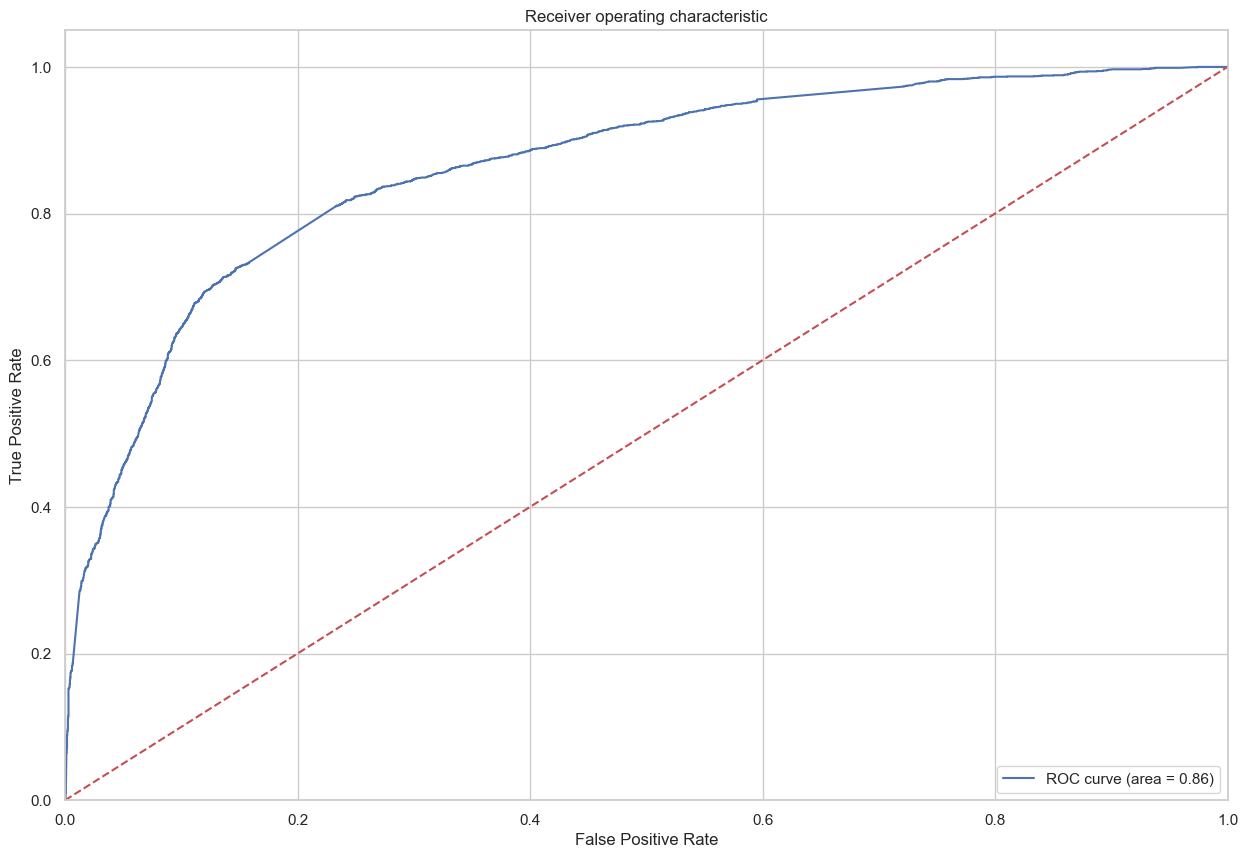

In [126]:
# Calling the roc curve function for plotting

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

In [127]:
# creating 10 points of probabilities to find the optimal point cutoff

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.333107,1871,1,1,1,1,0,0,0,0,0,0
6795,0,0.272324,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.216616,3516,1,1,1,0,0,0,0,0,0,0
8105,0,0.705671,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.333107,3934,1,1,1,1,0,0,0,0,0,0


### Accurary, Sensitivity, Specificity

In [128]:
# Calculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.381262    1.000000     0.000000
0.1          0.1  0.526129    0.982157     0.245127
0.2          0.2  0.699289    0.893350     0.579710
0.3          0.3  0.775201    0.824818     0.744628
0.4          0.4  0.806741    0.705191     0.869315
0.5          0.5  0.803494    0.650852     0.897551
0.6          0.6  0.787879    0.578670     0.916792
0.7          0.7  0.766698    0.483374     0.941279
0.8          0.8  0.740878    0.371452     0.968516
0.9          0.9  0.684292    0.181671     0.994003


### PLotting Accuracy, Sensitivity and Specificity

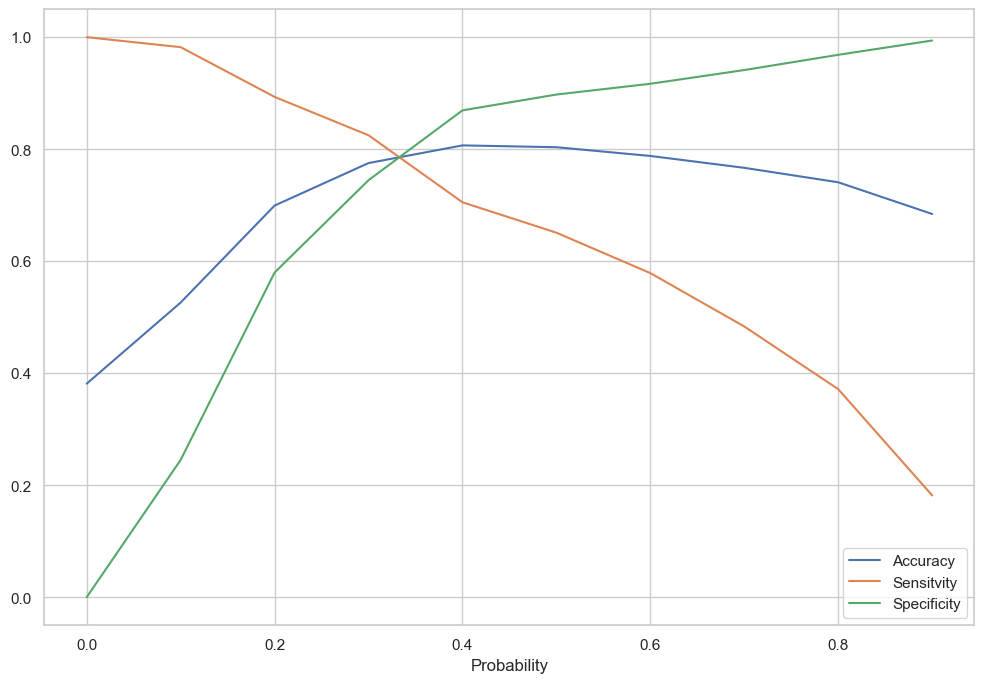

In [129]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'], figsize=(12,8))   # line plotting
plt.show()

In [130]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.333107,1871,1,1,1,1,0,0,0,0,0,0,1
6795,0,0.272324,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.216616,3516,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.705671,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.333107,3934,1,1,1,1,0,0,0,0,0,0,1


In [131]:
# Creating confusion matrix to find all the metrics

confusion_pr_train=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr_train

array([[2980, 1022],
       [ 432, 2034]], dtype=int64)

In [132]:
#Sensitivity score
Sensitivity_train =round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)  

#specificity score
Specificity_train =round((confusion_pr_train[0,0]/(confusion_pr_train[0,0]+confusion_pr_train[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_train)  
print('Specificity:',Specificity_train) 

Sensitivity: 82.48
Specificity: 74.46


In [133]:
#  Pecision score
Precision_train = round((confusion_pr_train[1,1]/(confusion_pr_train[0,1]+confusion_pr_train[1,1])*100),2)

#  Recall score
Recall_train = round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)

#print both
print('Precision:',Precision_train) 
print('Recall:',Recall_train)     

Precision: 66.56
Recall: 82.48


In [134]:
# Checking accuracy for train dataset 
from sklearn import metrics

Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100,2)
print('Train set Accuracy:',Accuracy_train)

Train set Accuracy: 77.52


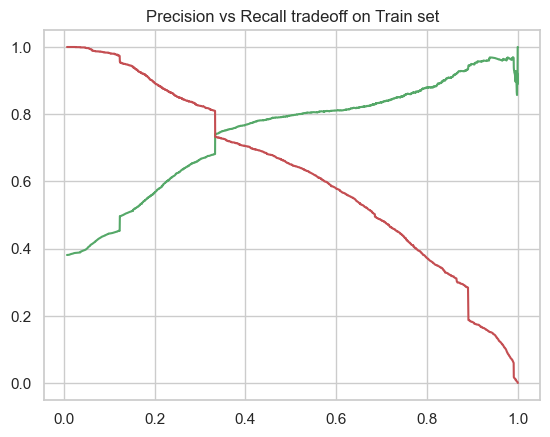

In [135]:
# importing precision recall curve from sklearn library for train set

from sklearn.metrics import precision_recall_curve, f1_score

# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

------
## Prediction on the test dataset
### Scaling the test dataset

In [136]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X_test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [137]:
# Predicting the test dataset with our final model

test_cols=X_train_3.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=logr3.predict(X_test_final)      # Predicting the final test set

In [138]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.360528,4269
2376,1,0.889902,2376
7766,1,0.773658,7766
9199,0,0.333107,9199
4359,1,0.889902,4359


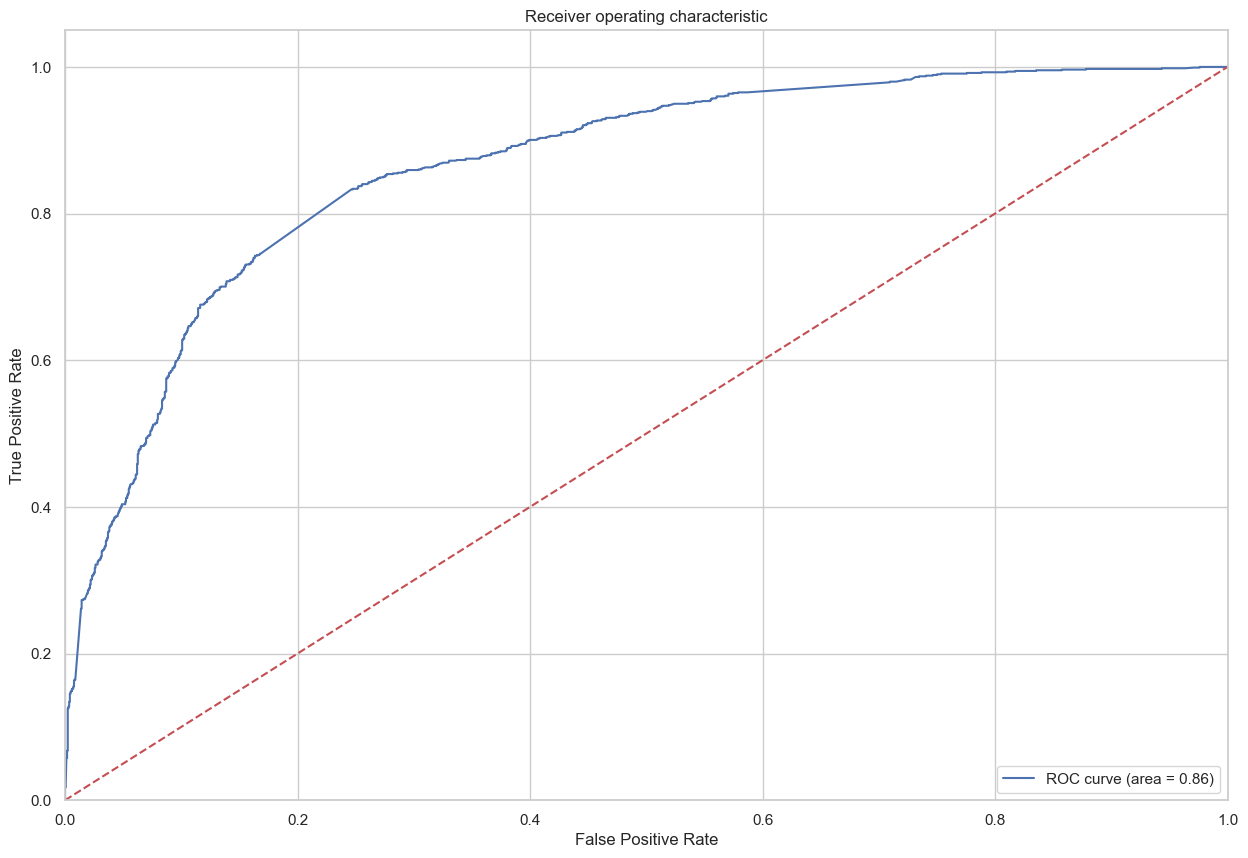

In [139]:
# Calling the roc curve function for plotting

draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

## Model Evaluation

In [140]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.360528,4269,1
2376,1,0.889902,2376,1
7766,1,0.773658,7766,1
9199,0,0.333107,9199,1
4359,1,0.889902,4359,1


In [141]:
# Creating confusion matrix to find precision and recall score

confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[1228,  449],
       [ 169,  926]], dtype=int64)

In [142]:
#Sensitivity score
Sensitivity_test =round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)  

#specificity score
Specificity_test =round((confusion_pr_test[0,0]/(confusion_pr_test[0,0]+confusion_pr_test[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test) 

Sensitivity: 84.57
Specificity: 73.23


In [143]:
#  Pecision score
Precision_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)

#  Recall score
Recall_test = round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)

#print both
print('Precision:',Precision_test) 
print('Recall:',Recall_test)     

Precision: 67.35
Recall: 84.57


In [144]:
# Checking test set accuracy

Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy:',Accuracy_test)

Test set Accuracy: 77.71


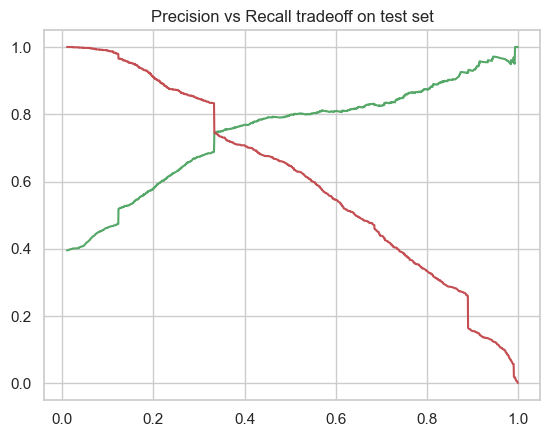

In [145]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)
plt.title('Precision vs Recall tradeoff on test set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [146]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  74.97975708502025


### Metrics Comparison between Train data set and Test data set

In [147]:
print('Train Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_train)   
print('Specificity:',Specificity_train)
print('Precision:',Precision_train) 
print('Recall:',Recall_train)
print('Accuracy:',Accuracy_train)
print()
print('Test Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test)
print('Precision:',Precision_test) 
print('Recall:',Recall_test)
print('Accuracy:',Accuracy_test)

Train Data Set metrics:

Sensitivity: 82.48
Specificity: 74.46
Precision: 66.56
Recall: 82.48
Accuracy: 77.52

Test Data Set metrics:

Sensitivity: 84.57
Specificity: 73.23
Precision: 67.35
Recall: 84.57
Accuracy: 77.71


### Assigning a Lead Score to the Predicted values based on Lead Number 

In [149]:
# Creating new columns for lead number and lead score
# lead score indicates higher score are hotter the leads and lower score are colder the leads.

y_test_pred_final['Lead Number']=lead_data.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))

y_test_pred_final.head(20)

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.360528,4269,1,0,36
2376,1,0.889902,2376,1,0,89
7766,1,0.773658,7766,1,0,77
9199,0,0.333107,9199,1,0,33
4359,1,0.889902,4359,1,0,89
9186,1,0.401649,9186,1,0,40
1631,1,0.605263,1631,1,0,61
8963,1,0.229116,8963,0,0,23
8007,0,0.092394,8007,0,0,9
5324,1,0.198619,5324,0,0,20


## Conclusion

Based on the analysis, 
- The model's performance metrics such as sensitivity, specificity, accuracy, precision, and recall scores from the test set are considered accurate and indicative of a well-performing model. 
- The model exhibits a higher recall score than precision, which is favorable in this context.
- From a business perspective, the model shows promise in adapting to the company's future requirements, suggesting its stability. 
- The identified important features, including Lead Origin_Lead Add Form, Total Time Spent on Website, and What is your current occupation_Working Professional, are significant contributors to the probability of lead conversion.

These findings provide valuable insights into the model's effectiveness and the factors influencing lead conversion.






